<b>Step 1a: Identify Information </b>

The data file contains the weather data for each day in a particular year.
Each column represents (per day):  
<ul>
<li>Max temperature
<li>Min temperature
<li>Mean temperature
<li>Heating degree-days: used to estimate heating requirements of buildings; any day with a mean temp greater than 18 degrees C has zero heating degree-days.
<li>Cooling degree-days: used to estimate air-conditioning requirements of buildings; any day with a mean temp less than 18 degrees C has zero heating degree-days.
<li>Total amount of rain in mm
<li>Total amount of snow in cm
<li>Total amount of precipitation in mm (snow + rain + hail, etc)
<li>Snow on ground in cm 
<li>Direction of maximum gust in 10's of degrees. Only recorded if max gust speed is greater than 29 km/h
<li>Speed of max gust in km/h
</ul>

<b>Step 1b: Description of what my program will produce  </b> 
<ul>
<li>It will return a month with the highest mean temperature.
<li>It will return a line chart of the max and min temperatures for each month.
<li>It will return the day that produced the greatest amount of rain.
<li>It will return the month with the greatest amount of rain, and the amount.
<li>It will return the month with the highest maximun gust speed.
<li>Create a bar graph showing the average amount of rain and snow produced each month in a year or a given data set (sometimes not a full year) <-- This is what I will be choosing.
</ul>

<b>Step 1c: Examples</b>
<ul>
<li>expect(rain_graph(read(daily_weather_2015.csv)), None) --> the graph will be a bar graph. The x axis will display the name of the months, and the y axis will represent the amount of rain and snow produced each month in mm. Each month will have 2 bars side by side, one representing the average amount of rain, and the other representing the average amount of snow for that month.



</ul>

<b>Step 2a: Design Data Definitions</b>

In [35]:
# I will need the year, month, average rain in mm, and average snow in mm from the information file.
# This information is crucial because the program will need to create a bar graph showing the mean amount of rain 
# and snow for each month. The graph title will need to display the year; it will change accordingly with different
# files. 

from cs103 import *
from typing import NamedTuple, List, Optional
import matplotlib.pyplot as pyplot
import csv
import numpy as np

Weather = NamedTuple('Weather', [('year', int),                   # range [1840, 2016]
                                 ('month', int),                  # range [1, 12]
                                 ('rain', Optional[float]),   # range [0, ...) or None in mm
                                 ('snow', Optional[float])])  # range [0, ...) or None in mm
# interp. weather with the year of the data, month, the amount of rain in mm, and the average amount of snow
# in mm

W0 = Weather(2015, 1, 0.0, 0.0)
W1 = Weather(2014, 2, 3.4, 80.0)
W2 = Weather(2014, 3, 23.6, None)
W3 = Weather(2013, 4, None, 0.0)

def fn_for_weather(w: Weather) -> ...: # template from compound 
    return ...(w.year,
               w.month, 
               w.rain,
               w.snow)

# List[Weather]
# interp. a list of weather data

L0 = []
L1 = [Weather(2014, 2, 3.4, 80.0), Weather(2014, 3, 23.6, 0.0)]
L2 = [Weather(2014, 2, 3.4, None), Weather(2014, 2, 1.8, 22.3), Weather(2014, 4, 22.0, 0.0), 
      Weather(2014, 4, 0.0, 0.0)]

def fn_for_low(low: List[Weather]) -> ...: # template from arbitrary-sized, reference rule
    # description of acc
    acc = ... # type: ...
    for w in low:
        ...(fn_for_weather(w), acc)
    return acc



<b>Step 2b: Design functions to read information and store as data</b>

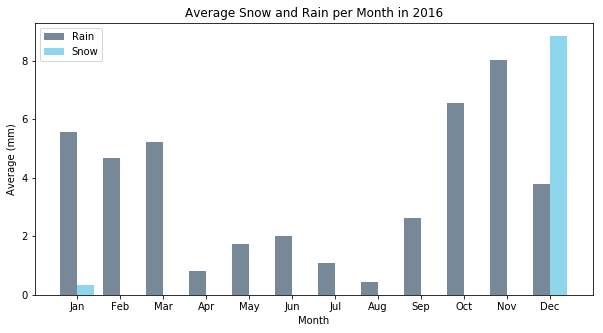

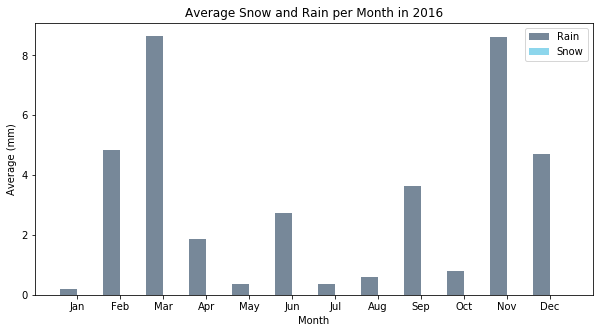

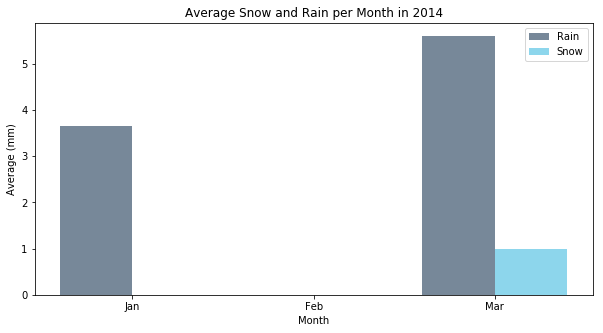

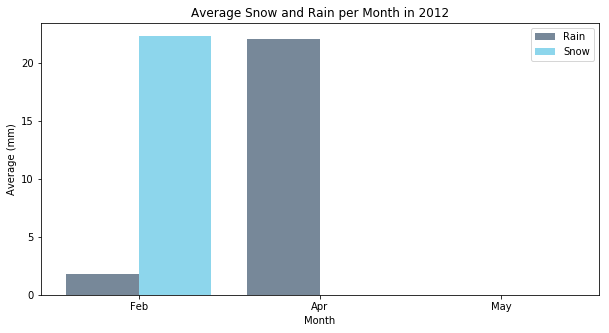

29 of 29 tests passed


In [44]:

def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data,
    returns a bar graph that represents the average snowfall and rainfall 
    in the given months in a given year
    """
    # template based on function composition
    return analyze(read(filename))

@typecheck
def read(filename: str) -> List[Weather]:
    """    
    reads information from the specified file and returns a list of weather data
    """
    # low contains the result so far
    low = [] # type: List[Weather]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        i = 0
        for i in range(0, 26):    
            next(reader)
            i += 1
        
        for row in reader:
            if ((not parse_float(row[17]) is None)):
                w = Weather(parse_int(row[1]), parse_int(row[2]), parse_float(row[15]), parse_float(row[17])*10)
            else:
                w = Weather(parse_int(row[1]), parse_int(row[2]), parse_float(row[15]), parse_float(row[17]))
            low.append(w)
    
    return low

@typecheck
def analyze(low: List[Weather]) -> None:
    """
    Takes in a list of weather data and returns a bar graph that represents the average snowfall and rainfall 
    in the given months
    """
    return weather_graph(weather_average(complete_data(low)))

@typecheck
def missing_data(w: Weather) -> bool:
    """
    Returns True if the data for rain or snow is missing (None)
    """
    # return [] # body of stub
    # template from List[Weather]
    return (w.rain is None or w.snow is None)

@typecheck
def complete_data(low: List[Weather]) -> List[Weather]:
    """
    Returns a list of weather data that is complete, ie. does not contain None
    """
    # return [] # body of stub
    # template from List[Weather] and reference rule
    # acc stores Weather that has complete data
    acc = [] # type: List[Weather]
    for w in low:
        if (not missing_data(w)):
            acc.append(w)
    return acc 

@typecheck
def average(total: float, days: int) -> float:
    """
    returns the average by dividing total by days
    """
    # return 0.0 # body of stub
    # template from reference rule
    return round((total/days), 2)
    

@typecheck
def weather_average(low: List[Weather]) -> List[Weather]:
    """
    Returns Weather with the amount of snow replaced as average in mm for snow for each month
    """
    # return 0.0 # body of stub
    # template from List[Weather]
    # ssum and rsum is total sum of snow and rain in a month seen so far
    # days is total sum of days seen so far in one month
    # acc stores Weather with the average rain and snow for one month
    ssum = 0.0 # type: float
    rsum = 0.0 # type: float
    days = 0 # type: int
    acc = []
    m = 1
    while m <= 12:
        for w in low:
            if (w.month == m):
                ssum += w.snow
                rsum += w.rain
                days += 1
        if (not days == 0):
            acc.append(Weather(w.year, m, average(rsum, days), average(ssum, days)))
            m += 1
            ssum = 0.0
            rsum = 0.0
            days = 0
        else: 
            m += 1
            ssum = 0.0
            rsum = 0.0
            days = 0
    return acc


    
@typecheck  
def get_rain_average(low: List[Weather]) -> List[float]:
    """
    returns List of rain averages per month
    """
    # return [] # body of stub
    # template from List[Weather]
    # rain_avgs stores list of rain averages per month seen so far
    rain_avgs = [] #type: List[float]
    for w in low:
        rain_avgs.append(w.rain)
    return rain_avgs

@typecheck
def get_snow_average(low: List[Weather]) -> List[float]:
    """
    returns List of snow averages per month
    """
    # return [] # body of stub
    # template from List[Weather]
    # snow_avgs stores list of rain averages per month seen so far
    snow_avgs = [] #type: List[float]
    for w in low:
        snow_avgs.append(w.snow)
    return snow_avgs

@typecheck
def month_name(w: Weather) -> str:
    """
    looks at w.month and returns the name of the month based on the number (ie 1 = Jan)
    """
    # return "" # body of stub
    # template from Weather, and One of
    if (w.month == 1): 
        return 'Jan'
    elif (w.month == 2):
        return 'Feb'
    elif (w.month == 3):
        return 'Mar'
    elif (w.month == 4):
        return 'Apr'
    elif (w.month == 5):
        return 'May'
    elif (w.month == 6):
        return 'Jun'
    elif (w.month == 7):
        return 'Jul'
    elif (w.month == 8):
        return 'Aug'
    elif (w.month == 9):
        return 'Sep'
    elif (w.month == 10):
        return 'Oct'
    elif (w.month == 11):
        return 'Nov'
    elif (w.month == 12):
        return 'Dec'

@typecheck
def get_month_names(low: List[Weather]) -> List[str]:
    """
    returns List of month names from given list
    """
    # return [] # body of stub
    # template from ntiist[Weather]
    # months stores list of month names seen so far
    months = [] # type: List[str]
    for w in low:
        months.append(month_name(w))
    return months

@typecheck
def year(low: List[Weather]) -> int:
    for w in low:
        year = w.year
    return year

@typecheck
def weather_graph(low: List[Weather]) -> None:
    """
    returns a bar graph that shows the average snow and rain in each month
    """
    yrain = get_rain_average(low)
    ysnow = get_snow_average(low)
    months = get_month_names(low)
    year_num = year(low)
    index = np.arange(len(months))
    width = 0.4
    #fig, ax = plt.subplots()
    pyplot.figure(figsize=(10,5))
    avg1 = pyplot.bar(index, yrain, width,
                      color='#778899',
                      label = 'Rain')
    avg2 = pyplot.bar(index+width, ysnow, width,
                      color='#8dd6ec',
                      label = 'Snow')

    pyplot.xlabel('Month')
    pyplot.ylabel('Average (mm)')
    pyplot.title('Average Snow and Rain per Month in ' + str(year_num))

    pyplot.legend()
    pyplot.xticks(index+width/2, months)
   
    return pyplot.show()

# Begin testing
start_testing()

# Examples and tests for main
expect(main('daily_weather_2016.csv'), None)

# Examples and tests for read
expect(read('daily_weather_2014_sample.csv'), [Weather(2014, 1, 0.8, 0.0), Weather(2014, 1, 13.8, 0.0), 
                                               Weather(2014, 1, 0.0, 0.0), Weather(2014, 1, 0.0, 0.0), 
                                               Weather(2014, 2, 0.0, 0.0), Weather(2014, 2, 0.0, 0.0), 
                                               Weather(2014, 2, 0.0, 0.0), Weather(2014, 2, 0.0, 0.0), 
                                               Weather(2014, 3, 0.0, 4.0), Weather(2014, 3, 10.2, 0.0), 
                                               Weather(2014, 3, 3.4, 0.0), Weather(2014, 3, 8.8, 0.0)])
expect(read('daily_weather_2016_sample.csv'), [Weather(2016, 1, 0.0, 0.0), Weather(2016, 1, 0.0, 0.0), 
                                               Weather(2016, 1, 0.0, 0.0), Weather(2016, 1, 0.8, 0.0), 
                                               Weather(2016, 2, 1.2, 0.0), Weather(2016, 2, 1.6, 0.0), 
                                               Weather(2016, 2, 12.2, 0.0), Weather(2016, 2, 4.4, 0.0), 
                                               Weather(2016, 3, 12.2, 0.0), Weather(2016, 3, 6.6, 0.0), 
                                               Weather(2016, 3, 5.4, 0.0), Weather(2016, 3, 10.4, 0.0), 
                                               Weather(2016, 4, 0.0, 0.0), Weather(2016, 4, 0.0, 0.0), 
                                               Weather(2016, 4, 1.2, 0.0), Weather(2016, 4, 6.2, 0.0), 
                                               Weather(2016, 5, 0.0, 0.0), Weather(2016, 5, 0.0, 0.0), 
                                               Weather(2016, 5, 0.0, 0.0), Weather(2016, 5, 1.4, 0.0), 
                                               Weather(2016, 6, 8.6, 0.0), Weather(2016, 6, 2.4, 0.0), 
                                               Weather(2016, 6, 0.0, 0.0), Weather(2016, 6, 0.0, 0.0), 
                                               Weather(2016, 7, 0.2, 0.0), Weather(2016, 7, 0.0, 0.0), 
                                               Weather(2016, 7, 0.0, 0.0), Weather(2016, 7, 1.2, 0.0), 
                                               Weather(2016, 8, 0.0, 0.0), Weather(2016, 8, 0.6, 0.0), 
                                               Weather(2016, 8, 1.8, 0.0), Weather(2016, 8, 0.0, 0.0), 
                                               Weather(2016, 9, 2.8, 0.0), Weather(2016, 9, 1.6, 0.0), 
                                               Weather(2016, 9, 10.2, 0.0), Weather(2016, 9, 0.0, 0.0), 
                                               Weather(2016, 10, 0.8, 0.0), Weather(2016, 10, 0.2, 0.0), 
                                               Weather(2016, 10, 0.6, 0.0), Weather(2016, 10, 1.6, 0.0), 
                                               Weather(2016, 11, 7.6, 0.0), Weather(2016, 11, 26.4, 0.0), 
                                               Weather(2016, 11, 0.0, 0.0), Weather(2016, 11, 0.4, 0.0), 
                                               Weather(2016, 12, 1.8, 0.0), Weather(2016, 12, 12.8, 0.0), 
                                               Weather(2016, 12, 4.2, 0.0), Weather(2016, 12, 0.0, 0.0)])

# examples and tests for analyze
expect(analyze(read('daily_weather_2016_sample.csv')), None)

# examples and tests for missing_data
expect(missing_data(Weather(2014, 2, 3.4, 80.0)), False)
expect(missing_data(Weather(2014, 2, 3.4, None)), True)
expect(missing_data(Weather(2013, 4, None, 0.0)), True)

# examples and tests for complete_data
expect(complete_data([]), [])
expect(complete_data(L2), [Weather(2014, 2, 1.8, 22.3), Weather(2014, 4, 22.0, 0.0), Weather(2014, 4, 0.0, 0.0)])
expect(complete_data([Weather(2014, 3, 23.6, None), Weather(2013, 4, None, 0.0)]), [])

# examples and tests for average
expect(average(45, 5), 9)
expect(average(100, 2), 50)
expect(average((2+3+4+5+1), 5), 3)

# examples and tests for weather_average
expect(weather_average(complete_data(L2)), [Weather(2014, 2, 1.8, 22.3), 
                                               Weather(2014, 4, 11.0, 0.0)])
expect(weather_average(complete_data(read('daily_weather_2016_sample.csv'))), [Weather(2016, 1, 0.2, 0.0), 
                                                                                  Weather(2016, 2, 4.85, 0.0), 
                                                                                  Weather(2016, 3, 8.65, 0.0), 
                                                                                  Weather(2016, 4, 1.85, 0.0), 
                                                                                  Weather(2016, 5, 0.35, 0.0), 
                                                                                  Weather(2016, 6, 2.75, 0.0), 
                                                                                  Weather(2016, 7, 0.35, 0.0), 
                                                                                  Weather(2016, 8, 0.6, 0.0), 
                                                                                  Weather(2016, 9, 3.65, 0.0), 
                                                                                  Weather(2016, 10, 0.8, 0.0), 
                                                                                  Weather(2016, 11, 8.6, 0.0), 
                                                                                  Weather(2016, 12, 4.7, 0.0)])
expect(weather_average(read('daily_weather_2014_sample.csv')), [Weather(2014, 1, 3.65, 0.0), 
                                                                Weather(2014, 2, 0.0, 0.0), 
                                                                Weather(2014, 3, 5.6, 1.0)])

# examples and tests for get_rain_average
expect(get_rain_average(weather_average(complete_data(read('daily_weather_2016_sample.csv')))), 
       [0.2, 4.85, 8.65, 1.85, 0.35, 2.75,0.35, 0.6, 3.65, 0.8,8.6, 4.7])
expect(get_rain_average([]), [])

# examples and tests for get_snow_average
expect(get_snow_average(weather_average(complete_data(read('daily_weather_2014_sample.csv')))), [0.0, 0.0, 1.0])
expect(get_snow_average([Weather(2014, 2, 1.8, 22.3), Weather(2014, 4, 22.0, 0.0), Weather(2014, 5, 0.0, 0.0)]), 
      [22.3, 0.0, 0.0])

# examples and tests for month_name
expect(month_name(Weather(2014, 2, 1.8, 22.3)), 'Feb')
expect(month_name(Weather(2014, 9, 2.5, 0.0)), 'Sep')

# examples and tests for get_month_names
expect(get_month_names([Weather(2014, 2, 1.8, 22.3), Weather(2014, 4, 22.0, 0.0), Weather(2014, 5, 0.0, 0.0)]), 
       ['Feb', 'Apr', 'May'])
expect(get_month_names(weather_average(read('daily_weather_2014_sample.csv'))), ['Jan', 'Feb', 'Mar'])
expect(get_month_names([]), [])

# examples and tests for year
expect(year(read('daily_weather_2014_sample.csv')), 2014)
expect(year(read('daily_weather_2016_sample.csv')), 2016)

# examples and tests for weather_graph
expect(weather_graph(weather_average(complete_data(read('daily_weather_2014_sample.csv')))), None)
expect(weather_graph(weather_average(complete_data([Weather(2012, 2, 1.8, 22.3), 
                                                    Weather(2012, 4, 22.0, 0.0), 
                                                    Weather(2012, 5, 0.0, 0.0)]))), None)

summary()